## CASK FR1 Correct Rate

In [1]:
import sys
sys.path.insert(0, '../scripts')

from accuracy import graph_cumulative_acc, read_and_record, graph_group_stats
from intervals import perform_T_test
from preprocessing import get_all_sheet_names

ctrl_path = '../FR1_ctrl.xlsx'
cask_path = '../FR1_cask.xlsx'
ctrl_sheets = get_all_sheet_names(ctrl_path)
cask_sheets = get_all_sheet_names(cask_path)

ctrl_ending_corr = []
cask_ending_corr = []
ctrl_learned_time = []
cask_learned_time = []

## Control Group

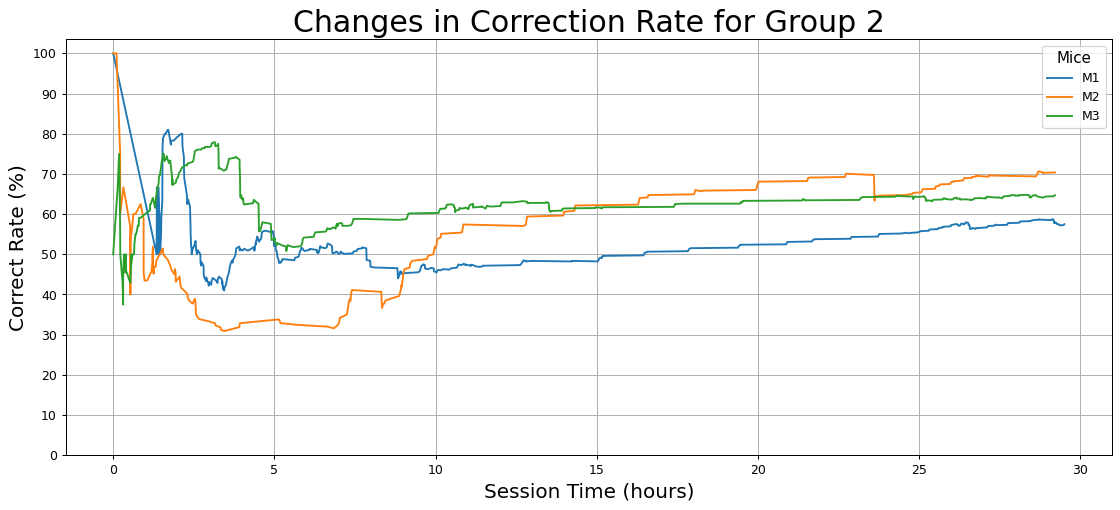

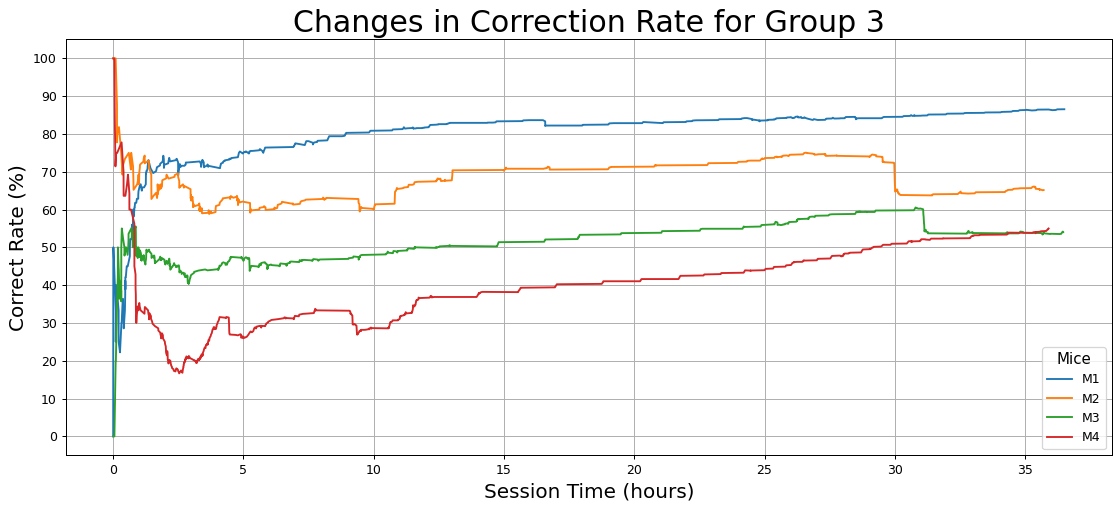

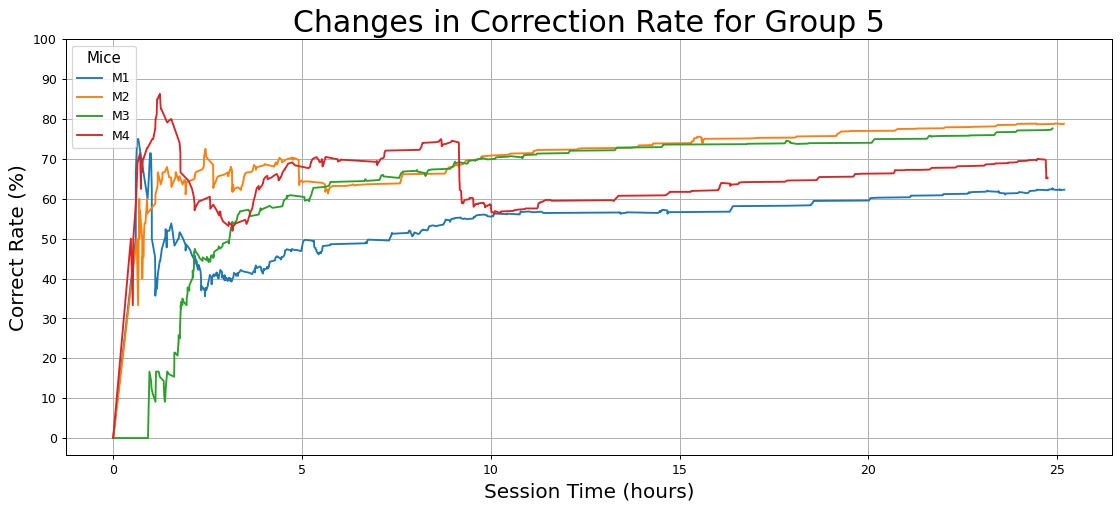

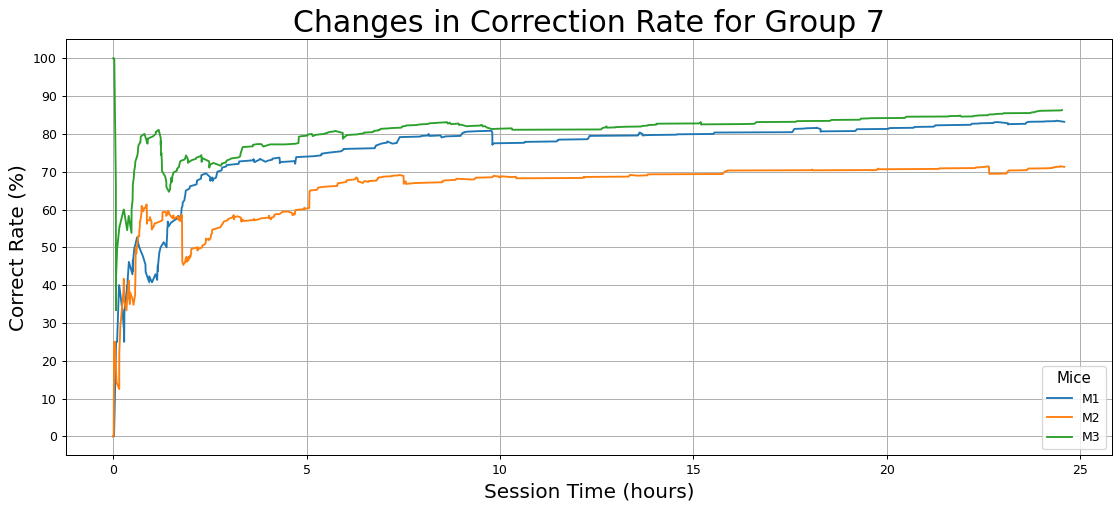

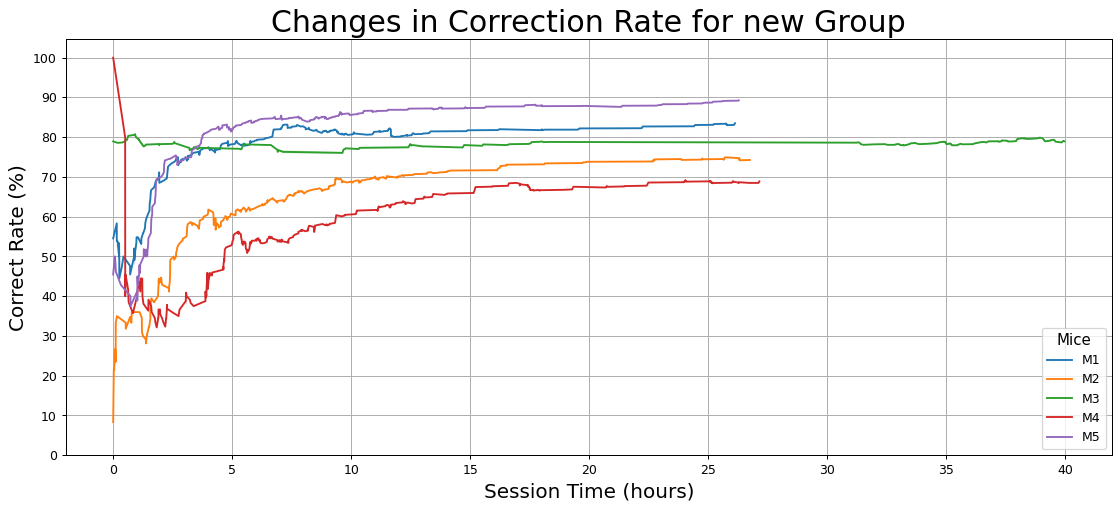

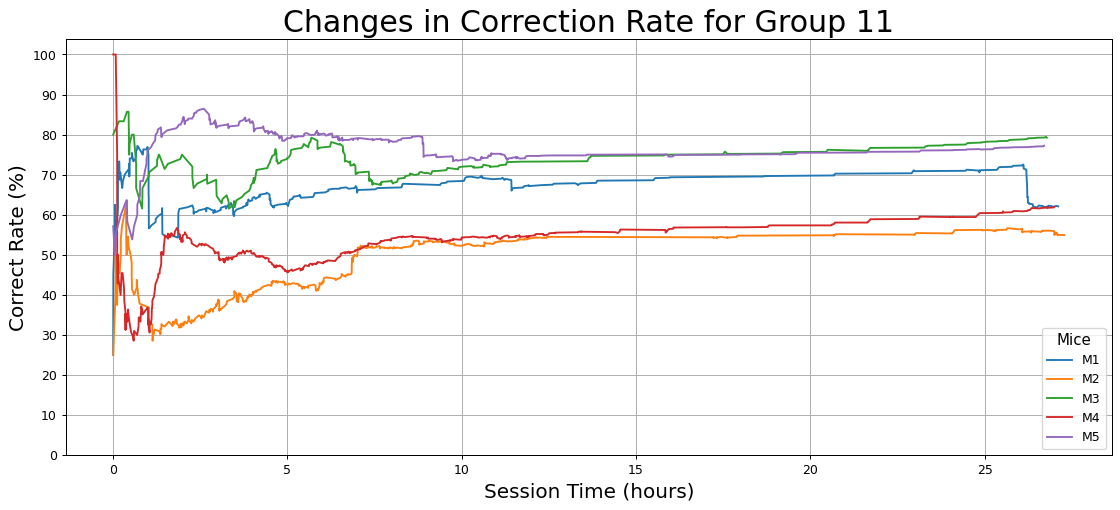

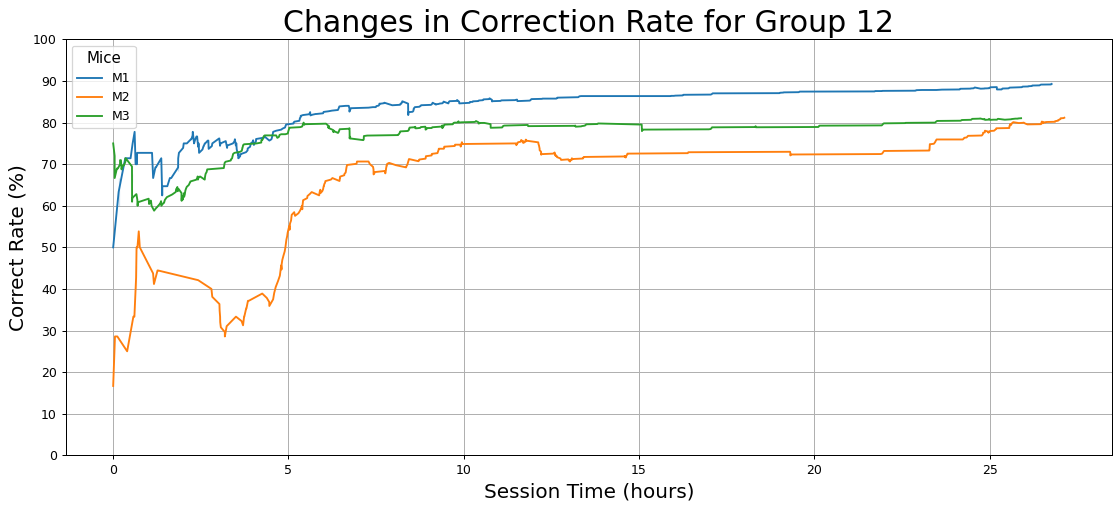

In [2]:
group_data = []
curr_group = int(ctrl_sheets[0].split('.')[0][1:]) if ctrl_sheets[0].startswith('B') else 'new'

for sheet in ctrl_sheets:
    temp = int(sheet.split('.')[0][1:]) if sheet.startswith('B') else 'new'
    data = read_and_record(path=ctrl_path, sheet=sheet, 
                           ending_corr=ctrl_ending_corr, 
                           learned_time=ctrl_learned_time)
    if temp != curr_group:
        graph_cumulative_acc(group_data, curr_group)
        group_data = []
    group_data.append(data)
    curr_group = temp

if len(group_data) > 0: 
    graph_cumulative_acc(group_data, curr_group)

## CASK Group

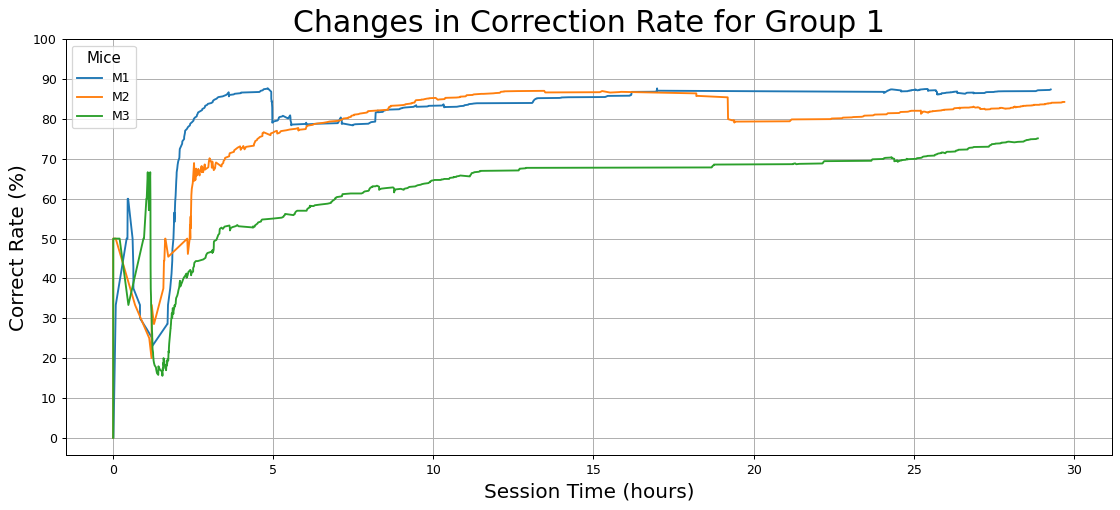

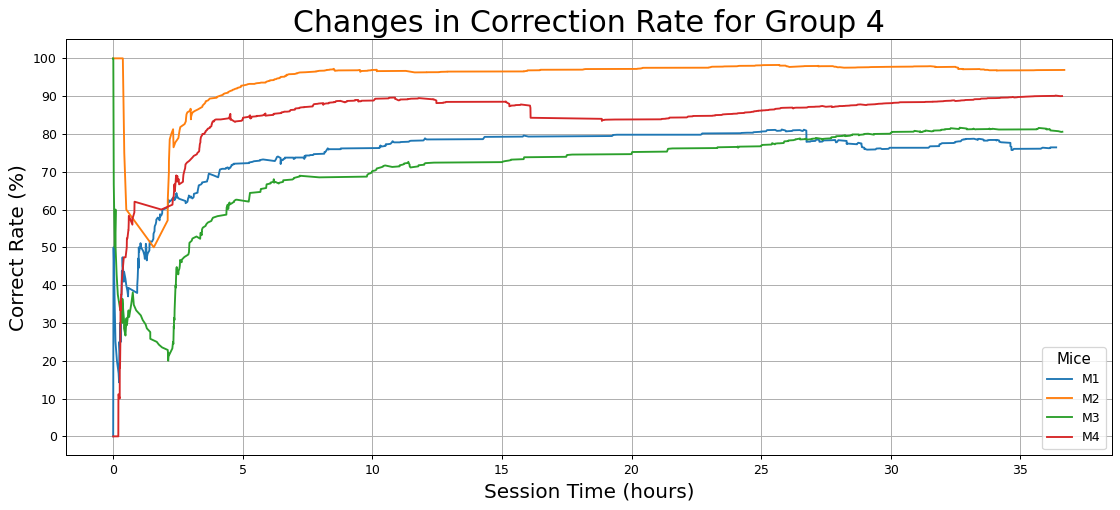

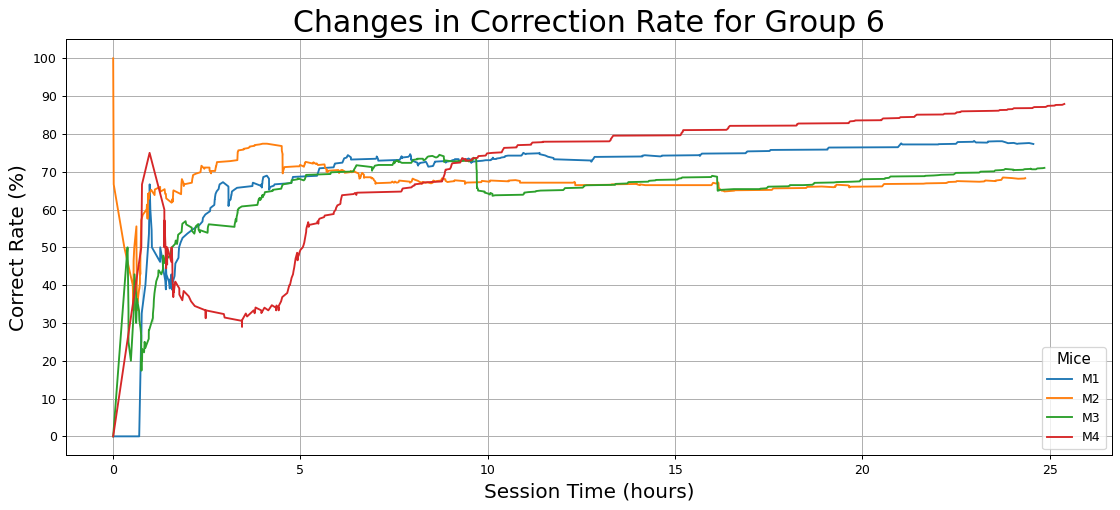

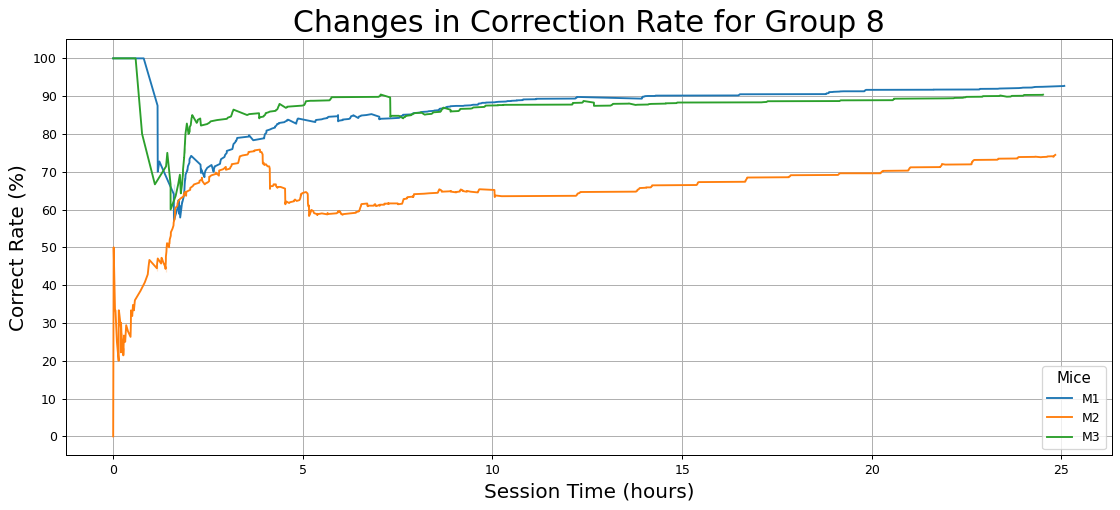

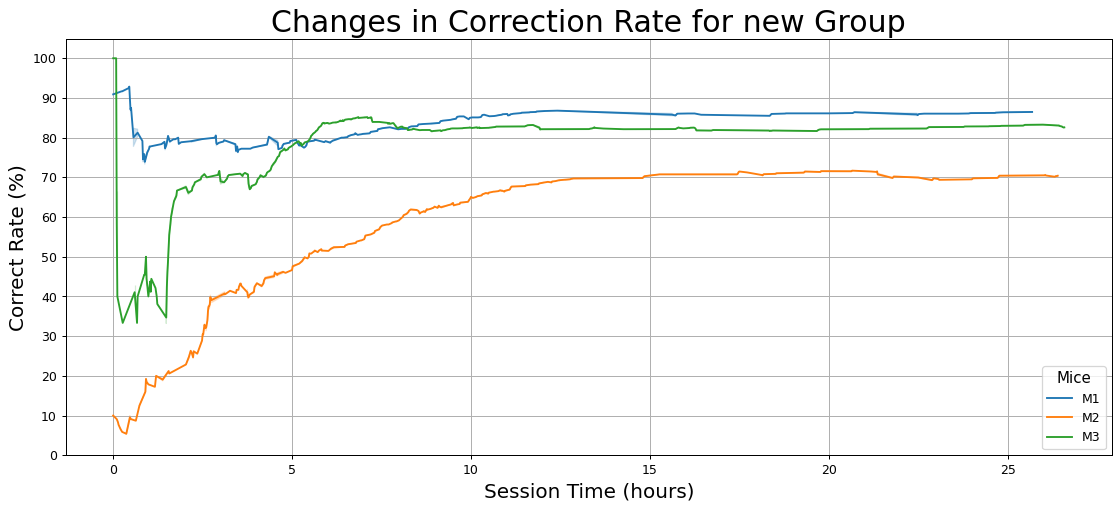

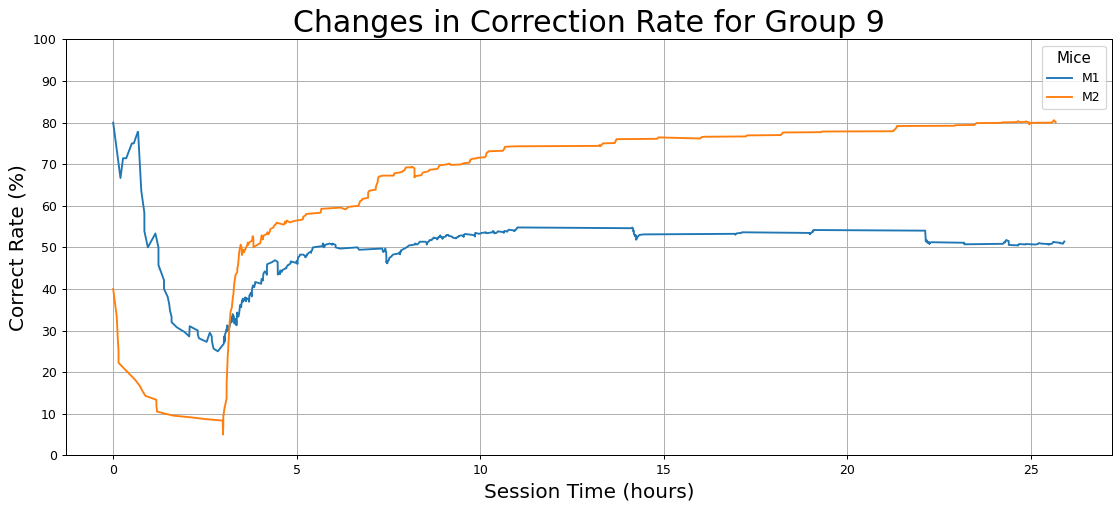

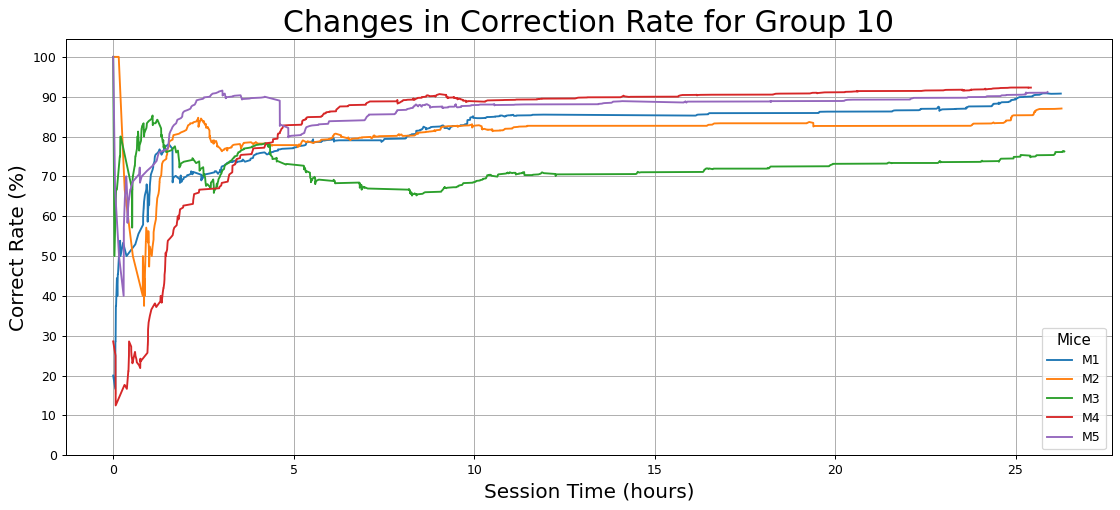

In [3]:
group_data = []
curr_group = int(cask_sheets[0].split('.')[0][1:]) if cask_sheets[0].startswith('B') else 'new'

for sheet in cask_sheets:
    temp = int(sheet.split('.')[0][1:]) if sheet.startswith('B') else 'new'
    data = read_and_record(path=cask_path, sheet=sheet, 
                           ending_corr=cask_ending_corr, 
                           learned_time=cask_learned_time)
    if temp != curr_group:
        graph_cumulative_acc(group_data, curr_group)
        group_data = []
    group_data.append(data)
    curr_group = temp

if len(group_data) > 0: 
    graph_cumulative_acc(group_data, curr_group)

### Analysis

#### Time need to reach 80% for 2 cont. hours

In [4]:
perform_T_test(ctrl_learned_time, cask_learned_time, test_side='less')

P Value is  0.005604872179898089
Experiment group is significantly less than control group


Control Size: 27
CASK Size: 24
Control Average: 4.416358024691358
CASK Average: 1.9821990740740738
Control Standard Deviation: 3.9910052925413897
CASK Standard Deviation: 2.2539585606097474


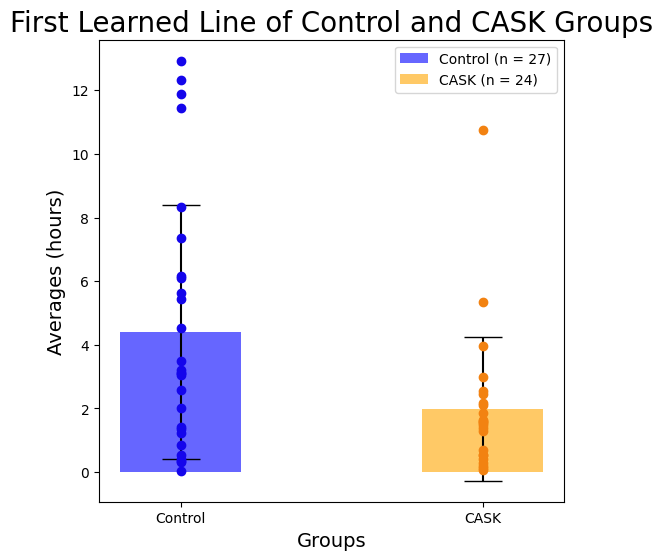

In [6]:
graph_group_stats(ctrl=ctrl_learned_time, exp=cask_learned_time, exp_name='CASK', stats_name='First Learned Line', unit='hours')

In [7]:
import pickle
pickle.dump((ctrl_ending_corr, cask_ending_corr), open('./ctrl_fr1_acc.pkl', 'wb'))

#### Ctrl/Cask Ending/Overall Correct Rate

In [8]:
perform_T_test(ctrl_ending_corr, cask_ending_corr, test_side='greater')

P Value is  0.0036819866036367057
Experiment group is significantly greater than control group


Control Size: 27
CASK Size: 24
Control Average: 71.9599069440694
CASK Average: 80.5381634482254
Control Standard Deviation: 11.500203762195047
CASK Standard Deviation: 10.258621233381849


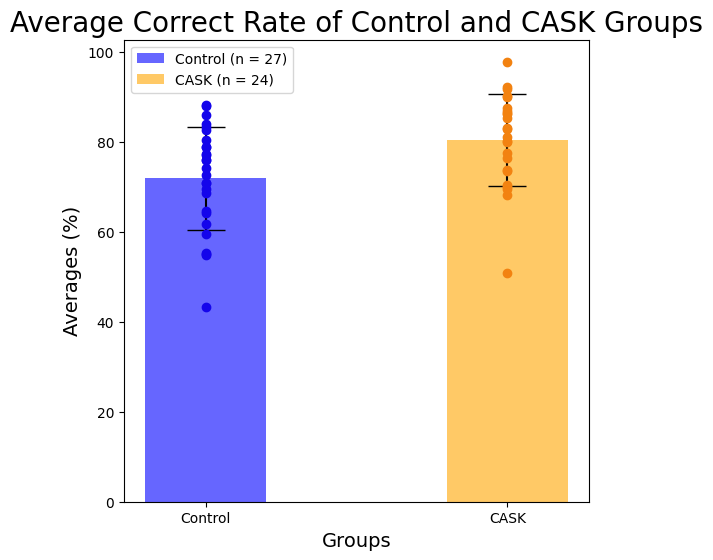

In [9]:
graph_group_stats(ctrl=ctrl_ending_corr, exp=cask_ending_corr, exp_name='CASK', stats_name='Average Correct Rate', unit='%')